In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_iris

C:\Users\Manav Sharma\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
data=pd.read_csv(r'C:\Users\Manav Sharma\Downloads\iris.csv',sep=",")

In [18]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


In [19]:
x=data.iloc[:,1:5]
y=data.iloc[:,5]

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [124]:
x_train=x_train.as_matrix()
y_train=y_train.as_matrix()

In [125]:
x_t=np.c_[np.ones((len(x_train),1)),x_train]

In [126]:
y_0=np.zeros((len(y_train),1))
y_1=np.zeros((len(y_train),1))
y_2=np.zeros((len(y_train),1))

In [127]:
for i in range(len(y_train)):
    if y_train[i]==0:
        y_0[i]=1
    elif y_train[i]==1:
        y_1[i]=1
    else:
        y_2[i]=1

In [128]:
t_0=np.zeros((5,1))
t_1=np.zeros((5,1))
t_2=np.zeros((5,1))

In [129]:
def cost(x,y,t):
    h=1/(1+np.exp(-1*np.dot(x,t)))
    j=(-1/len(y))*(np.sum(y*np.log(h)+(1-y)*np.log(1-h)))
    return j

In [130]:
alpha=0.01
j_history=np.zeros((50000,1))

In [131]:
for i in range(50000):
    h=1/(1+np.exp(-1*np.dot(x_t,t_0)))
    q=h-y_0
    t_0=t_0-(alpha/len(y_0))*(np.dot(x_t.T,q))
    j=cost(x_t,y_0,t_0)
    j_history[i]=j

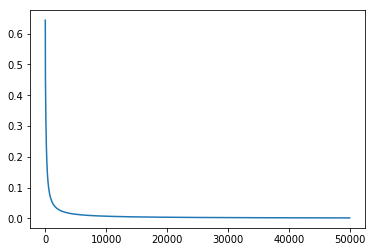

In [132]:
plt.plot(np.arange(50000),j_history)
plt.show()

In [133]:
for i in range(50000):
    h=1/(1+np.exp(-1*np.dot(x_t,t_1)))
    q=h-y_1
    t_1=t_1-(alpha/len(y_0))*(np.dot(x_t.T,q))
    j=cost(x_t,y_1,t_1)
    j_history[i]=j

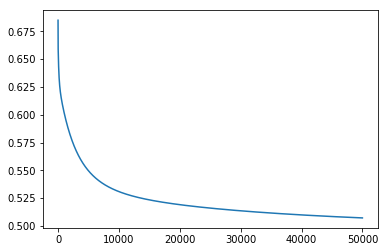

In [134]:
plt.plot(np.arange(50000),j_history)
plt.show()

In [135]:
for i in range(50000):
    h=1/(1+np.exp(-1*np.dot(x_t,t_2)))
    q=h-y_2
    t_2=t_2-(alpha/len(y_0))*(np.dot(x_t.T,q))
    j=cost(x_t,y_2,t_2)
    j_history[i]=j

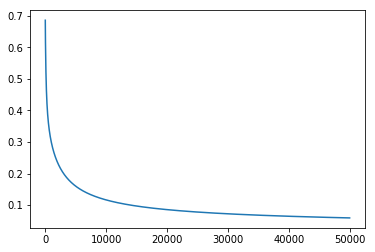

In [136]:
plt.plot(np.arange(50000),j_history)
plt.show()

In [137]:
x_test=x_test.as_matrix()
y_test=y_test.as_matrix()

In [138]:
x_a=np.c_[np.ones((len(x_test),1)),x_test]

In [139]:
h_0=1/(1+np.exp(-1*np.dot(x_a,t_0)))
h_1=1/(1+np.exp(-1*np.dot(x_a,t_1)))
h_2=1/(1+np.exp(-1*np.dot(x_a,t_2)))

In [140]:
h=np.zeros((len(h_0),1))

In [141]:
for i in range(len(h_0)):
    if h_0[i]>h_1[i] and h_0[i]>h_2[i]:
        h[i]=0
    elif h_1[i]>h_0[i] and h_1[i]>h_2[i]:
        h[i]=1
    else:
        h[i]=2

In [142]:
c=0
for i in range(len(h)):
    if h[i]==y_test[i]:
        c=c+1
print((c/len(h))*100)

93.33333333333333
